In [1]:
import sys
sys.path.append('../src/squad')

In [2]:
from collections import Counter
from common import Vocabulary, Span, Answer, Question, Paragraph, SquadData
from config import Config as cf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = SquadData.load(cf.SQUAD_DATA.replace('../../', '../'))

Loading squad data from pickle file ../data/SQUAD_Data/v1.1/squad_processed-v1.1.pkl...


# Paragraphs

In [4]:
print('Num of paragraphs: {:,}'.format(len(data.train_paragraphs)))
print('Num of paragraphs: {:,}'.format(len(data.dev_paragraphs)))

Num of paragraphs: 18,896
Num of paragraphs: 2,067


# Questions

In [5]:
ques_train_count = 0
ques_dev_count = 0
for para in data.train_paragraphs:
    ques_train_count += len(para.questions)
for para in data.dev_paragraphs:
    ques_dev_count += len(para.questions)

print('Num of questions: {:,}'.format(ques_train_count))
print('Num of questions: {:,}'.format(ques_dev_count))

Num of questions: 87,599
Num of questions: 10,570


# Distribution of context

In [6]:
context_len = Counter()
for para in data.train_paragraphs:
    context_len[len(para.context_toks)] += 1

In [7]:
total = 0
longer_than = 0
for k in sorted(list(context_len.keys())):
    total += context_len[k]
    if k > 400:
        longer_than += context_len[k]

In [8]:
print('The longest context: ', max(list(context_len.keys())))
print('Num of context longer than 400: {}/{}'.format(longer_than, total))

The longest context:  809
Num of context longer than 400: 44/18896


# Distribution of query

In [9]:
query_len = Counter()
for para in data.train_paragraphs:
    for ques in para.questions:
        query_len[len(ques.question_toks)] += 1

In [10]:
x, y = [], []
total, longer_than = 0, 0
for k in sorted(list(query_len.keys())):
    x.append(k)
    y.append(query_len[k])
    total += query_len[k]
    if k > 50:
        longer_than += query_len[k]

In [11]:
print('The longest query: ', max(list(query_len.keys())))
print('Num of queries longer than 50: {}/{}'.format(longer_than, total))

The longest query:  60
Num of queries longer than 50: 1/87599


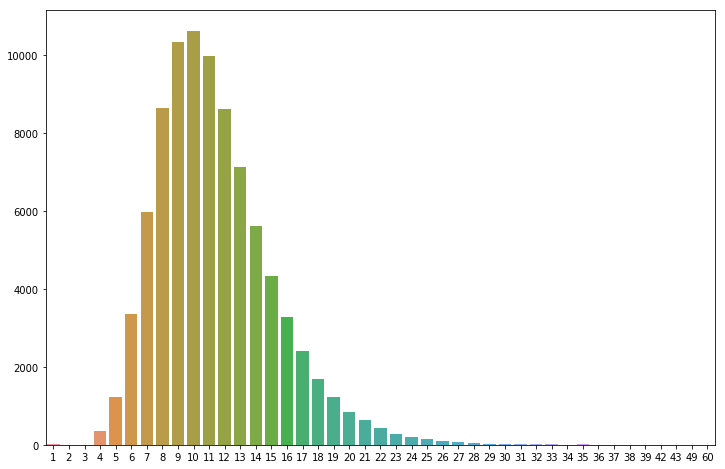

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x, y)

# Distribution of answer length

In [13]:
ans_len = Counter()

In [14]:
for para in data.train_paragraphs:
    for ques in para.questions:
        for ans in ques.answers:
            ans_len[ans.span.end-ans.span.start] += 1

In [15]:
x, y = [], []
total = 0
longer_30 = 0
for k in sorted(list(ans_len.keys())):
    x.append(k)
    y.append(ans_len[k])
    total += ans_len[k]
    if k > 30:
        longer_30 += ans_len[k]

In [16]:
print('The longest span: ', max(list(ans_len.keys())))
print('Num of spans longer than 30: {}/{}'.format(longer_30, total))

The longest span:  45
Num of spans longer than 30: 33/87599


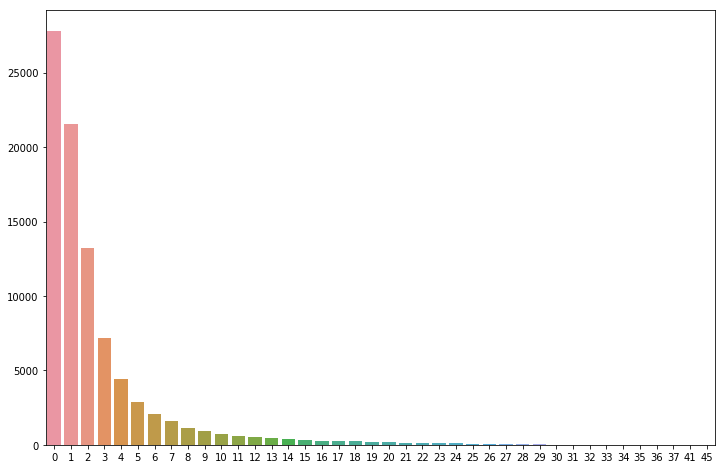

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x, y)